# Unit 1: Laboratorio - Filtros e Intuición de Convoluciones
## Implementar Filtros Manualmente y Visualizar Efectos de Convoluciones

**Objetivos del Laboratorio:**
1. Entender qué es un filtro (kernel) mediante manipulación directa
2. Implementar convoluciones manualmente
3. Experimentar con diferentes kernels
4. Crear un "filtro detector" simple para clasificar entre dos imágenes

**Entrega:** 
- Este notebook completado con todas las secciones
- Los kernels que creaste
- Explicación de cómo tu clasificador funciona

---

## Setup: Importar Librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy import signal
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo para mejor visualización
plt.style.use('default')
np.set_printoptions(precision=2, suppress=True)

print("✓ Librerías importadas exitosamente")

✓ Librerías importadas exitosamente


## Sección 1: Creación de Imágenes de Prueba

Vamos a crear dos imágenes diferentes que representan dos categorías que queremos distinguir.

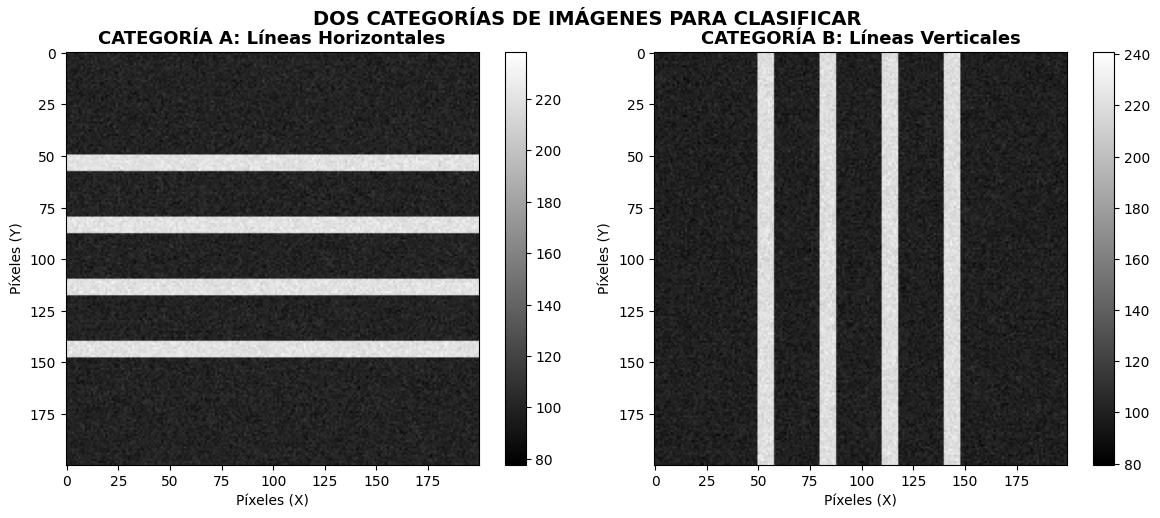

✓ Imágenes creadas:
  - Imagen A (Líneas Horizontales): (200, 200)
  - Imagen B (Líneas Verticales): (200, 200)


In [2]:
def crear_imagen_categoria_A(height=200, width=200, seed=42):
    """Crea una imagen que representa la CATEGORÍA A: Líneas Horizontales"""
    np.random.seed(seed)
    img = np.ones((height, width), dtype=np.float32) * 100
    
    # Agregar líneas horizontales claras
    for y in [50, 80, 110, 140]:
        img[y:y+8, :] = 220  # Líneas blancas
    
    # Agregar pequeño ruido gaussiano
    img += np.random.normal(0, 5, img.shape)
    
    return np.clip(img, 0, 255).astype(np.float32)

def crear_imagen_categoria_B(height=200, width=200, seed=43):
    """Crea una imagen que representa la CATEGORÍA B: Líneas Verticales"""
    np.random.seed(seed)
    img = np.ones((height, width), dtype=np.float32) * 100
    
    # Agregar líneas verticales claras
    for x in [50, 80, 110, 140]:
        img[:, x:x+8] = 220  # Líneas blancas
    
    # Agregar pequeño ruido gaussiano
    img += np.random.normal(0, 5, img.shape)
    
    return np.clip(img, 0, 255).astype(np.float32)

# Crear las imágenes
img_categoria_A = crear_imagen_categoria_A()
img_categoria_B = crear_imagen_categoria_B()

# Visualizar
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

im = axes[0].imshow(img_categoria_A, cmap='gray')
axes[0].set_title('CATEGORÍA A: Líneas Horizontales', fontweight='bold', fontsize=13)
axes[0].set_xlabel('Píxeles (X)')
axes[0].set_ylabel('Píxeles (Y)')
plt.colorbar(im, ax=axes[0])

im = axes[1].imshow(img_categoria_B, cmap='gray')
axes[1].set_title('CATEGORÍA B: Líneas Verticales', fontweight='bold', fontsize=13)
axes[1].set_xlabel('Píxeles (X)')
axes[1].set_ylabel('Píxeles (Y)')
plt.colorbar(im, ax=axes[1])

fig.suptitle('DOS CATEGORÍAS DE IMÁGENES PARA CLASIFICAR', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("✓ Imágenes creadas:")
print(f"  - Imagen A (Líneas Horizontales): {img_categoria_A.shape}")
print(f"  - Imagen B (Líneas Verticales): {img_categoria_B.shape}")

## Sección 2: Entender Kernels - Experimento Guiado

Vamos a entender cómo diferentes kernels responden a las características de nuestras imágenes.


📊 Aplicando convoluciones...



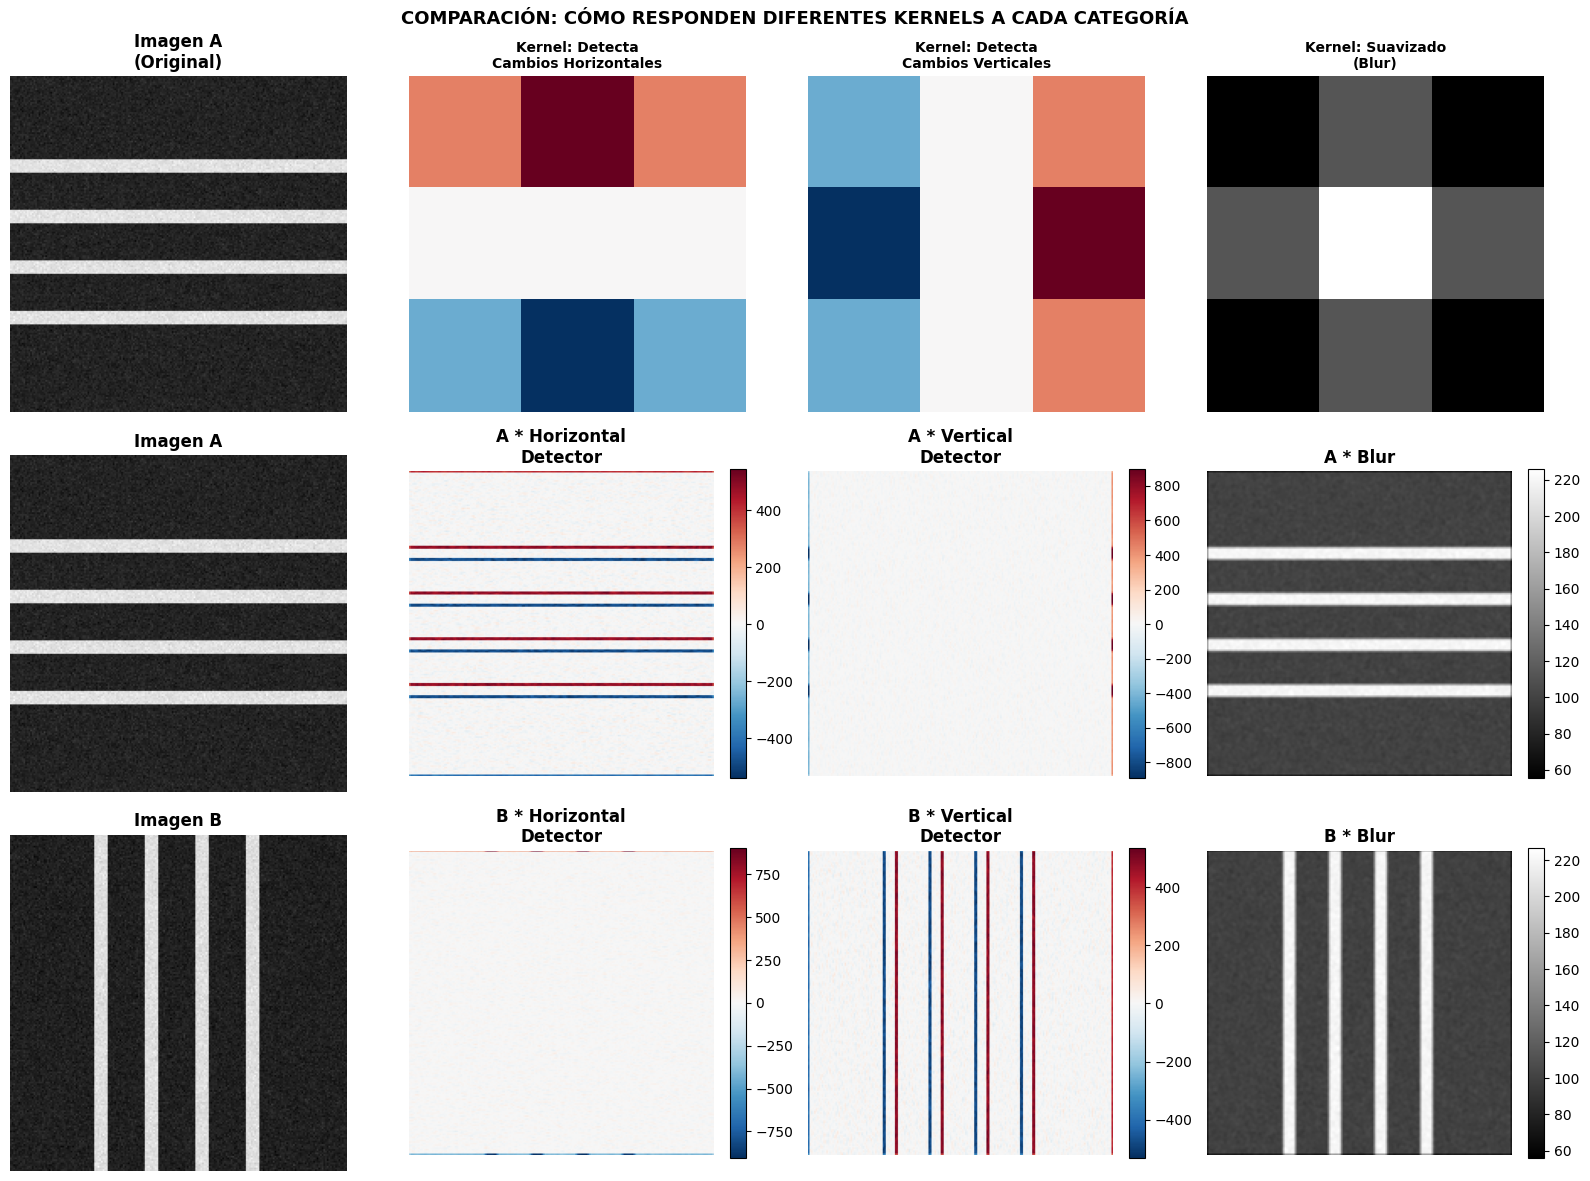


📈 ANÁLISIS DE RESPUESTAS:

Categoría A (Líneas Horizontales):
  - Detector Horizontal: Media=0.02, Max=546.36
  - Detector Vertical:   Media=0.00, Max=899.56
  - Suavizado:           Media=118.64, Max=226.11

Categoría B (Líneas Verticales):
  - Detector Horizontal: Media=-0.00, Max=903.87
  - Detector Vertical:   Media=0.02, Max=535.20
  - Suavizado:           Media=118.68, Max=226.62

✓ Observación: El detector de cambios horizontales responde MÁS a líneas horizontales
✓ Observación: El detector de cambios verticales responde MÁS a líneas verticales


In [3]:
# Definir algunos kernels básicos
kernel_detactor_horizontal = np.array([
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]
], dtype=np.float32)

kernel_detector_vertical = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)

kernel_suavizado = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
], dtype=np.float32) / 16

# Aplicar convoluciones
print("\n📊 Aplicando convoluciones...\n")

# Categoría A con diferentes filtros
A_horizontal = signal.convolve2d(img_categoria_A, kernel_detactor_horizontal, mode='same')
A_vertical = signal.convolve2d(img_categoria_A, kernel_detector_vertical, mode='same')
A_suavizado = signal.convolve2d(img_categoria_A, kernel_suavizado, mode='same')

# Categoría B con diferentes filtros
B_horizontal = signal.convolve2d(img_categoria_B, kernel_detactor_horizontal, mode='same')
B_vertical = signal.convolve2d(img_categoria_B, kernel_detector_vertical, mode='same')
B_suavizado = signal.convolve2d(img_categoria_B, kernel_suavizado, mode='same')

# Visualizar resultados
fig, axes = plt.subplots(3, 4, figsize=(16, 12))

# Fila 1: Original
axes[0, 0].imshow(img_categoria_A, cmap='gray')
axes[0, 0].set_title('Imagen A\n(Original)', fontweight='bold')
axes[0, 0].axis('off')

axes[0, 1].imshow(kernel_detactor_horizontal, cmap='RdBu_r')
axes[0, 1].set_title('Kernel: Detecta\nCambios Horizontales', fontweight='bold', fontsize=10)
axes[0, 1].axis('off')

axes[0, 2].imshow(kernel_detector_vertical, cmap='RdBu_r')
axes[0, 2].set_title('Kernel: Detecta\nCambios Verticales', fontweight='bold', fontsize=10)
axes[0, 2].axis('off')

axes[0, 3].imshow(kernel_suavizado, cmap='gray')
axes[0, 3].set_title('Kernel: Suavizado\n(Blur)', fontweight='bold', fontsize=10)
axes[0, 3].axis('off')

# Fila 2: Resultados Categoría A
axes[1, 0].imshow(img_categoria_A, cmap='gray')
axes[1, 0].set_title('Imagen A', fontweight='bold')
axes[1, 0].axis('off')

im = axes[1, 1].imshow(A_horizontal, cmap='RdBu_r')
axes[1, 1].set_title('A * Horizontal\nDetector', fontweight='bold')
axes[1, 1].axis('off')
plt.colorbar(im, ax=axes[1, 1], fraction=0.046)

im = axes[1, 2].imshow(A_vertical, cmap='RdBu_r')
axes[1, 2].set_title('A * Vertical\nDetector', fontweight='bold')
axes[1, 2].axis('off')
plt.colorbar(im, ax=axes[1, 2], fraction=0.046)

im = axes[1, 3].imshow(A_suavizado, cmap='gray')
axes[1, 3].set_title('A * Blur', fontweight='bold')
axes[1, 3].axis('off')
plt.colorbar(im, ax=axes[1, 3], fraction=0.046)

# Fila 3: Resultados Categoría B
axes[2, 0].imshow(img_categoria_B, cmap='gray')
axes[2, 0].set_title('Imagen B', fontweight='bold')
axes[2, 0].axis('off')

im = axes[2, 1].imshow(B_horizontal, cmap='RdBu_r')
axes[2, 1].set_title('B * Horizontal\nDetector', fontweight='bold')
axes[2, 1].axis('off')
plt.colorbar(im, ax=axes[2, 1], fraction=0.046)

im = axes[2, 2].imshow(B_vertical, cmap='RdBu_r')
axes[2, 2].set_title('B * Vertical\nDetector', fontweight='bold')
axes[2, 2].axis('off')
plt.colorbar(im, ax=axes[2, 2], fraction=0.046)

im = axes[2, 3].imshow(B_suavizado, cmap='gray')
axes[2, 3].set_title('B * Blur', fontweight='bold')
axes[2, 3].axis('off')
plt.colorbar(im, ax=axes[2, 3], fraction=0.046)

fig.suptitle('COMPARACIÓN: CÓMO RESPONDEN DIFERENTES KERNELS A CADA CATEGORÍA',
             fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

# Estadísticas
print("\n📈 ANÁLISIS DE RESPUESTAS:")
print("\nCategoría A (Líneas Horizontales):")
print(f"  - Detector Horizontal: Media={A_horizontal.mean():.2f}, Max={A_horizontal.max():.2f}")
print(f"  - Detector Vertical:   Media={A_vertical.mean():.2f}, Max={A_vertical.max():.2f}")
print(f"  - Suavizado:           Media={A_suavizado.mean():.2f}, Max={A_suavizado.max():.2f}")

print("\nCategoría B (Líneas Verticales):")
print(f"  - Detector Horizontal: Media={B_horizontal.mean():.2f}, Max={B_horizontal.max():.2f}")
print(f"  - Detector Vertical:   Media={B_vertical.mean():.2f}, Max={B_vertical.max():.2f}")
print(f"  - Suavizado:           Media={B_suavizado.mean():.2f}, Max={B_suavizado.max():.2f}")

print("\n✓ Observación: El detector de cambios horizontales responde MÁS a líneas horizontales")
print("✓ Observación: El detector de cambios verticales responde MÁS a líneas verticales")

## Sección 3: 🎯 EJERCICIO 1 - Crear tu Propio Kernel

Ahora es tu turno de crear kernels que mejor distingan entre las dos categorías.

**Instrucciones:**
1. Define un kernel de 3×3 que creas que será útil
2. Pruébalo en ambas imágenes
3. Analiza qué características detecta
4. Ajusta los valores si es necesario


📌 Tu Kernel 1:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


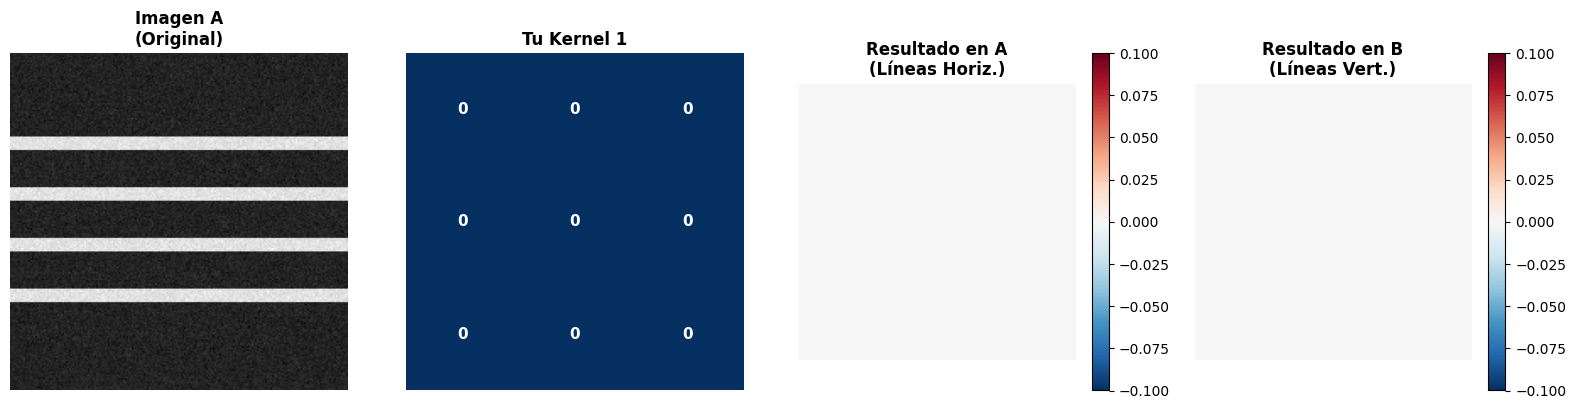


📊 ANÁLISIS DE TU KERNEL 1:
Respuesta en Imagen A: Media=0.00, Max=0.00, Min=0.00
Respuesta en Imagen B: Media=0.00, Max=0.00, Min=0.00

Diferencia de máximos: 0.00
⚠ Prueba ajustando los valores del kernel


In [4]:
# 📝 CREA TU KERNEL AQUÍ
# Reemplaza los ceros con números que creas que funcionarán
# Puedes usar números negativos y positivos

mi_kernel_1 = np.array([
    [0, 0, 0],  # ← Cambia estos valores
    [0, 0, 0],  # ← Cambia estos valores
    [0, 0, 0]   # ← Cambia estos valores
], dtype=np.float32)

print("\n📌 Tu Kernel 1:")
print(mi_kernel_1)

# Aplicar tu kernel
resultado_A_kernel1 = signal.convolve2d(img_categoria_A, mi_kernel_1, mode='same') # mode 'same' para mantener tamaño
resultado_B_kernel1 = signal.convolve2d(img_categoria_B, mi_kernel_1, mode='same')

# Visualizar
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

im = axes[0].imshow(img_categoria_A, cmap='gray')
axes[0].set_title('Imagen A\n(Original)', fontweight='bold')
axes[0].axis('off')

im = axes[1].imshow(mi_kernel_1, cmap='RdBu_r')
axes[1].set_title('Tu Kernel 1', fontweight='bold')
axes[1].axis('off')
for i in range(mi_kernel_1.shape[0]):
    for j in range(mi_kernel_1.shape[1]):
        axes[1].text(j, i, f'{mi_kernel_1[i,j]:.0f}', ha='center', va='center', 
                    fontsize=11, fontweight='bold', color='white')

im = axes[2].imshow(resultado_A_kernel1, cmap='RdBu_r')
axes[2].set_title('Resultado en A\n(Líneas Horiz.)', fontweight='bold')
axes[2].axis('off')
plt.colorbar(im, ax=axes[2])

im = axes[3].imshow(resultado_B_kernel1, cmap='RdBu_r')
axes[3].set_title('Resultado en B\n(Líneas Vert.)', fontweight='bold')
axes[3].axis('off')
plt.colorbar(im, ax=axes[3])

plt.tight_layout()
plt.show()

# Análisis
print("\n📊 ANÁLISIS DE TU KERNEL 1:")
print(f"Respuesta en Imagen A: Media={resultado_A_kernel1.mean():.2f}, Max={resultado_A_kernel1.max():.2f}, Min={resultado_A_kernel1.min():.2f}")
print(f"Respuesta en Imagen B: Media={resultado_B_kernel1.mean():.2f}, Max={resultado_B_kernel1.max():.2f}, Min={resultado_B_kernel1.min():.2f}")

dif_max = abs(resultado_A_kernel1.max() - resultado_B_kernel1.max())
print(f"\nDiferencia de máximos: {dif_max:.2f}")
if dif_max > 50:
    print("✓ ¡Buena separación entre categorías!")
else:
    print("⚠ Prueba ajustando los valores del kernel")

## Sección 4: 🎯 EJERCICIO 2 - Crear un Segundo Kernel

Crea un segundo kernel complementario que capture otras características.


📌 Tu Kernel 2:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


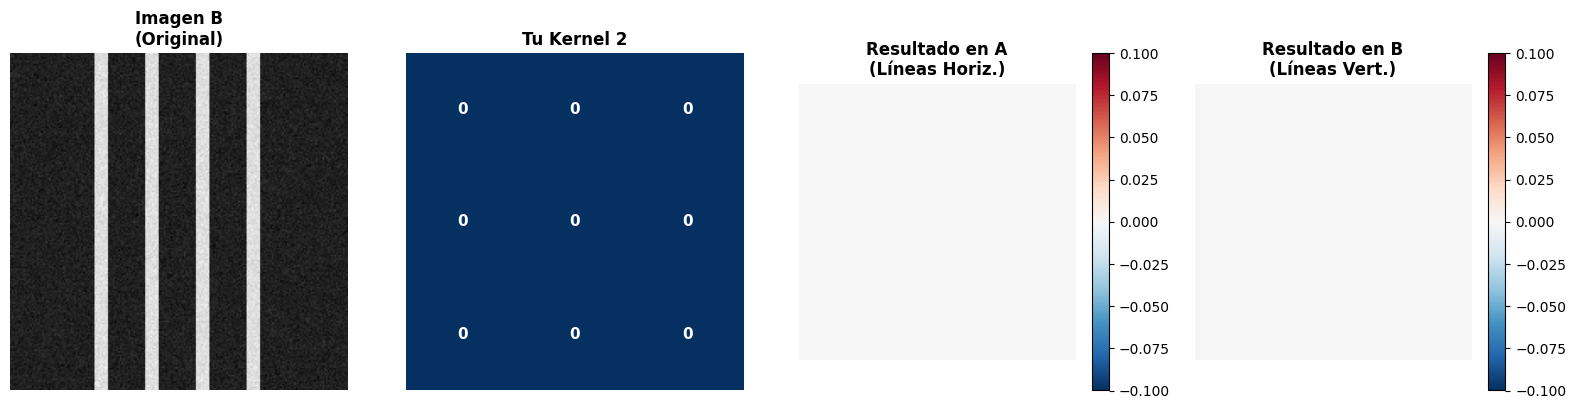


📊 ANÁLISIS DE TU KERNEL 2:
Respuesta en Imagen A: Media=0.00, Max=0.00, Min=0.00
Respuesta en Imagen B: Media=0.00, Max=0.00, Min=0.00


In [5]:
# 📝 CREA TU SEGUNDO KERNEL AQUÍ
mi_kernel_2 = np.array([
    [0, 0, 0],  # ← Cambia estos valores
    [0, 0, 0],  # ← Cambia estos valores
    [0, 0, 0]   # ← Cambia estos valores
], dtype=np.float32)

print("\n📌 Tu Kernel 2:")
print(mi_kernel_2)

# Aplicar tu kernel
resultado_A_kernel2 = signal.convolve2d(img_categoria_A, mi_kernel_2, mode='same')
resultado_B_kernel2 = signal.convolve2d(img_categoria_B, mi_kernel_2, mode='same')

# Visualizar
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

im = axes[0].imshow(img_categoria_B, cmap='gray')
axes[0].set_title('Imagen B\n(Original)', fontweight='bold')
axes[0].axis('off')

im = axes[1].imshow(mi_kernel_2, cmap='RdBu_r')
axes[1].set_title('Tu Kernel 2', fontweight='bold')
axes[1].axis('off')
for i in range(mi_kernel_2.shape[0]):
    for j in range(mi_kernel_2.shape[1]):
        axes[1].text(j, i, f'{mi_kernel_2[i,j]:.0f}', ha='center', va='center', 
                    fontsize=11, fontweight='bold', color='white')

im = axes[2].imshow(resultado_A_kernel2, cmap='RdBu_r')
axes[2].set_title('Resultado en A\n(Líneas Horiz.)', fontweight='bold')
axes[2].axis('off')
plt.colorbar(im, ax=axes[2])

im = axes[3].imshow(resultado_B_kernel2, cmap='RdBu_r')
axes[3].set_title('Resultado en B\n(Líneas Vert.)', fontweight='bold')
axes[3].axis('off')
plt.colorbar(im, ax=axes[3])

plt.tight_layout()
plt.show()

# Análisis
print("\n📊 ANÁLISIS DE TU KERNEL 2:")
print(f"Respuesta en Imagen A: Media={resultado_A_kernel2.mean():.2f}, Max={resultado_A_kernel2.max():.2f}, Min={resultado_A_kernel2.min():.2f}")
print(f"Respuesta en Imagen B: Media={resultado_B_kernel2.mean():.2f}, Max={resultado_B_kernel2.max():.2f}, Min={resultado_B_kernel2.min():.2f}")

## Sección 5: 🎯 EJERCICIO 3 - Crear un Clasificador Simple

Combina tus dos kernels para crear un clasificador básico que distinga entre las dos categorías.

In [6]:
def clasificar_imagen(imagen, kernel1, kernel2):
    """
    Clasifica una imagen como Categoría A o B usando dos kernels.
    
    Retorna:
    - score_A: Puntuación para categoría A
    - score_B: Puntuación para categoría B
    - clase: 'A' si score_A > score_B, 'B' en caso contrario
    """
    
    # Aplicar convoluciones
    resultado1 = signal.convolve2d(imagen, kernel1, mode='same')
    resultado2 = signal.convolve2d(imagen, kernel2, mode='same')
    
    # Calcular "energía" (suma de valores absolutos cuadrados)
    score_1 = np.sum(resultado1 ** 2)
    score_2 = np.sum(resultado2 ** 2)
    
    # Determinar clase
    # 📝 MODIFICA ESTA LÓGICA SI LO NECESITAS:
    if score_1 > score_2:
        clase = 'A'
    else:
        clase = 'B'
    
    return score_1, score_2, clase

# Probar el clasificador
print("\n🤖 PROBANDO EL CLASIFICADOR:")
print("\n" + "="*60)

# Clasificar imagen de categoría A
score_A1, score_A2, clase_A = clasificar_imagen(img_categoria_A, mi_kernel_1, mi_kernel_2)
print(f"\nImagen A (Líneas Horizontales):")
print(f"  Score Kernel 1: {score_A1:.2f}")
print(f"  Score Kernel 2: {score_A2:.2f}")
print(f"  ➜ Clasificada como: {clase_A}")
print(f"  ✓ CORRECTO" if clase_A == 'A' else f"  ✗ INCORRECTO")

# Clasificar imagen de categoría B
score_B1, score_B2, clase_B = clasificar_imagen(img_categoria_B, mi_kernel_1, mi_kernel_2)
print(f"\nImagen B (Líneas Verticales):")
print(f"  Score Kernel 1: {score_B1:.2f}")
print(f"  Score Kernel 2: {score_B2:.2f}")
print(f"  ➜ Clasificada como: {clase_B}")
print(f"  ✓ CORRECTO" if clase_B == 'B' else f"  ✗ INCORRECTO")

print("\n" + "="*60)

# Calcular precisión
aciertos = (clase_A == 'A') + (clase_B == 'B')
accuracy = aciertos / 2 * 100
print(f"\n📊 PRECISIÓN DEL CLASIFICADOR: {accuracy:.0f}%")

if accuracy == 100:
    print("🎉 ¡Perfecto! ¡Tu clasificador funciona correctamente!")
elif accuracy == 50:
    print("⚠️  Necesitas mejorar los kernels. No está mejor que un clasificador aleatorio.")
else:
    print("✓ Buen progreso. Puedes intentar mejorar los kernels.")


🤖 PROBANDO EL CLASIFICADOR:


Imagen A (Líneas Horizontales):
  Score Kernel 1: 0.00
  Score Kernel 2: 0.00
  ➜ Clasificada como: B
  ✗ INCORRECTO

Imagen B (Líneas Verticales):
  Score Kernel 1: 0.00
  Score Kernel 2: 0.00
  ➜ Clasificada como: B
  ✓ CORRECTO


📊 PRECISIÓN DEL CLASIFICADOR: 50%
⚠️  Necesitas mejorar los kernels. No está mejor que un clasificador aleatorio.


## Sección 6: 📊 Visualizar el Espacio de Características

Veamos cómo tus kernels transforman las imágenes en un "espacio de características".

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def kernels(image):

  kernel1 = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]], dtype=np.float32)

  kernel2 = np.array([
    [-1,  0,  1],
    [-2,  0,  2],
    [-1,  0,  1]], dtype=np.float32)
  
  # Aplicar kernel1 a la imagen original
  filtered1 = cv2.filter2D(
      image,
      ddepth=cv2.CV_32F,
      kernel=kernel1
  )
  
  # Aplicar kernel2 a la imagen original
  filtered2 = cv2.filter2D(
      image,
      ddepth=cv2.CV_32F,
      kernel=kernel2
  )
  
  # Sumar las imágenes filtradas
  filtered = np.sqrt(np.pow(filtered1, 2) + np.pow(filtered2, 2))
  
  # Normalización para visualizar
  filtered_norm = cv2.normalize(
      filtered, None, 0, 255, cv2.NORM_MINMAX
  ).astype(np.uint8)

  return filtered_norm

In [2]:
import os

os.chdir('dataset_classificator')

pen = []
coin = []

# Definir tamaño fijo, por ejemplo 256x256
fixed_size = (256, 256)

for target in ['coin', 'pen']:
  for file in os.listdir(target):
    image = cv2.imread(os.path.join(target, file))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    if target == 'coin':
      coin.append(gray)
    else:
      pen.append(gray)


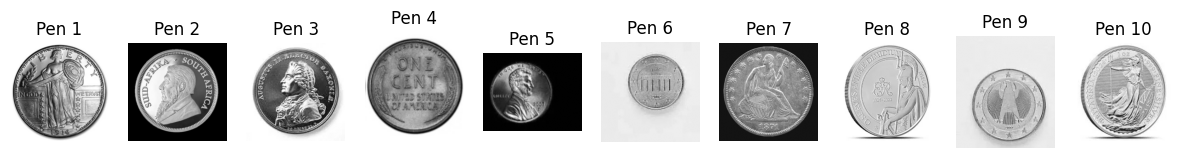

In [8]:
import matplotlib.pyplot as plt

# Graficar todas las imágenes de pen procesadas
fig, axes = plt.subplots(1, len(coin), figsize=(15, 5))
for i, img in enumerate(coin):
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f'Pen {i+1}')
    axes[i].axis('off')
plt.show()

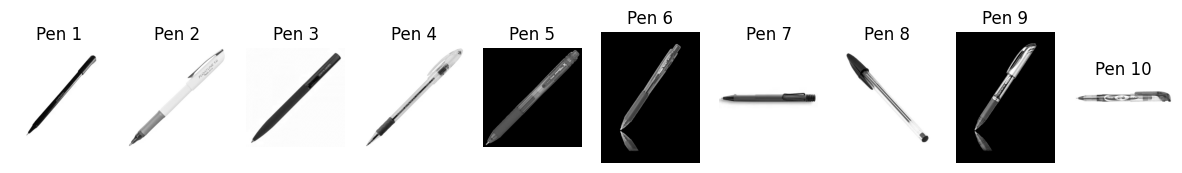

In [9]:
import matplotlib.pyplot as plt

# Graficar todas las imágenes de pen procesadas
fig, axes = plt.subplots(1, len(pen), figsize=(15, 5))
for i, img in enumerate(pen):
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f'Pen {i+1}')
    axes[i].axis('off')
plt.show()

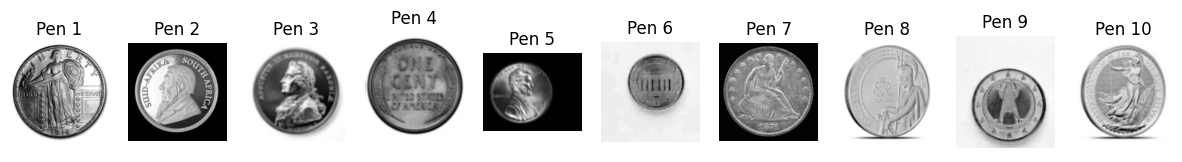

In [3]:
import matplotlib.pyplot as plt

# Graficar todas las imágenes de pen procesadas
fig, axes = plt.subplots(1, len(coin), figsize=(15, 5))
for i, img in enumerate(coin):
    img = cv2.GaussianBlur(img, (5, 5), 1)
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f'Pen {i+1}')
    axes[i].axis('off')
plt.show()

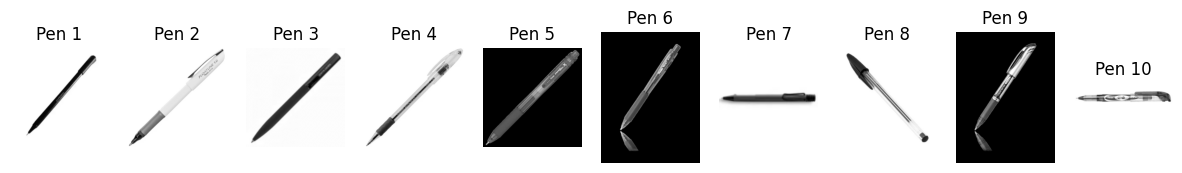

In [4]:
import matplotlib.pyplot as plt

# Graficar todas las imágenes de pen procesadas
fig, axes = plt.subplots(1, len(pen), figsize=(15, 5))
for i, img in enumerate(pen):
    img = cv2.GaussianBlur(img, (5, 5), 1)
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f'Pen {i+1}')
    axes[i].axis('off')
plt.show()

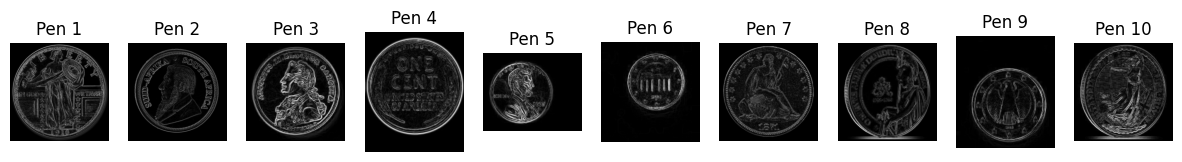

In [5]:
import matplotlib.pyplot as plt

# Graficar todas las imágenes de pen procesadas
fig, axes = plt.subplots(1, len(coin), figsize=(15, 5))
for i, img in enumerate(coin):
    filtered_norm = kernels(img)
    axes[i].imshow(filtered_norm, cmap='gray')
    axes[i].set_title(f'Pen {i+1}')
    axes[i].axis('off')
plt.show()

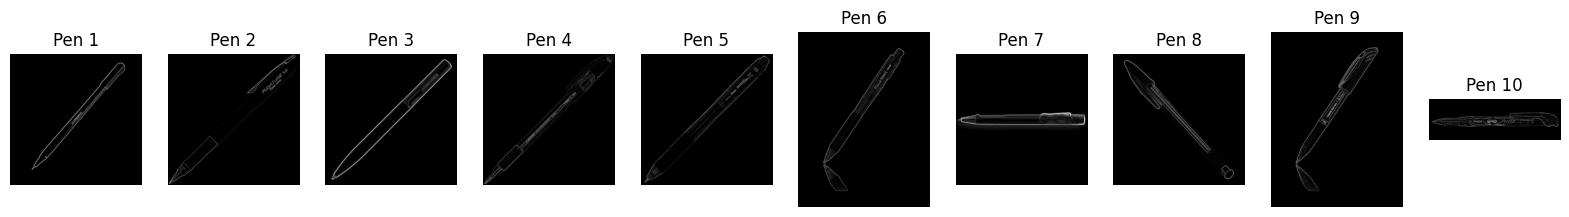

In [6]:
import matplotlib.pyplot as plt

# Graficar todas las imágenes de pen procesadas
fig, axes = plt.subplots(1, len(pen), figsize=(20, 10))
for i, img in enumerate(pen):
    filtered_norm = kernels(img)
    axes[i].imshow(filtered_norm, cmap='gray')
    axes[i].set_title(f'Pen {i+1}')
    axes[i].axis('off')
plt.show()

In [7]:
def evaluar_clasificador(lista_imagenes, etiqueta_real):
    aciertos = 0
    total = len(lista_imagenes)
    predicciones = []

    for img in lista_imagenes:
        bordes_8u = kernels(img)
        
        contornos, _ = cv2.findContours(bordes_8u, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        if contornos:
            cnt = max(contornos, key=cv2.contourArea)
            area = cv2.contourArea(cnt)
            perimetro = cv2.arcLength(cnt, True)
            
            if perimetro > 0:
                circularidad = (4 * np.pi * area) / (perimetro ** 2)
                pred = 1 if circularidad > 0.3 else 0
                predicciones.append(pred)
                
                if pred == etiqueta_real:
                    aciertos += 1
        else:
            predicciones.append(-1)

    return aciertos, total


aciertos_pen, total_pen = evaluar_clasificador(pen, 0)
aciertos_coin, total_coin = evaluar_clasificador(coin, 1)

total_general = total_pen + total_coin
total_aciertos = aciertos_pen + aciertos_coin
accuracy = (total_aciertos / total_general) * 100

print("-" * 30)
print(f"RESULTADOS DEL CLASIFICADOR")
print("-" * 30)
print(f"Plumas:  {aciertos_pen}/{total_pen} correctas")
print(f"Monedas: {aciertos_coin}/{total_coin} correctas")
print("-" * 30)
print(f"ACCURACY TOTAL: {accuracy:.2f}%")
print("-" * 30)

------------------------------
RESULTADOS DEL CLASIFICADOR
------------------------------
Plumas:  10/10 correctas
Monedas: 8/10 correctas
------------------------------
ACCURACY TOTAL: 90.00%
------------------------------


## 📝 SECCIÓN 7: INFORME FINAL

Completa este informe explicando tu trabajo:

### Responde las siguientes preguntas:

**1. ¿Qué valores pusiste en tu Kernel 1 y por qué?**

```
Mi Kernel 1:
[-1, -2, -1]
[ 0,  0,  0]
[ 1,  2,  1]

Razón:

Detecta lineas horizontales en la imagen, lo cual es útil para identificar bordes y contornos que son característicos de una de las categorías.
```
---

**2. ¿Qué valores pusiste en tu Kernel 2 y por qué?**

```
Mi Kernel 2:
[-1,  0,  1]
[-2,  0,  2]
[-1,  0,  1]

Razón:

Detecta lineas verticales en la imagen, lo cual complementa al primer kernel y ayuda a capturar diferentes características relevantes para la clasificación.
```
---

**3. ¿Cómo funciona tu clasificador?**

```
Los combino aplicando la raiz cuadrada de la suma de los cuadrados de las respuestas de ambos kernels, con esto logró resaltar los bordes en ambas direcciones. Luego, mediante un algoritmo implmentado en la libreria cv2 para determinar el contorno de los objetos. Una vez con ese borde calculo que tan circulares son los objetos para clasificarlos en una de las dos categorías. Si el coeficiente de circularidad es mayor a 0.3, lo clasifico en la categoría A, de lo contrario en la categoría B.
```
---

**4. ¿Qué patrones detecta cada kernel?**

```
Kernel 1 detecta:

Bordes horizontales en la imagen.

Kernel 2 detecta:

Bordes verticales en la imagen.
```

---

**5. Si tu clasificador no fue 100% acertado, ¿qué cambiarías?**

```
Podría tratar de reducir el ruido de las imagenes con algun filtro que evite difuminar los bordes.
```

---

**6. Conexión con CNNs: ¿Cómo se relaciona esto con redes neuronales convolucionales?**

```
Este ejercicio te ayuda a entender cómo funcionan las capas de convolución en redes neuronales convolucionales. Al aplicar kernels de detección de bordes, estás simulando cómo una capa convolucional extrae características locales de una imagen. Cada kernel actúa como un filtro que detecta ciertos patrones, y al combinarlos, se obtiene una representación más rica de la imagen. Esto es similar a cómo las CNNs usan múltiples filtros para detectar características como bordes, texturas o formas complejas en diferentes capas.
```

---

### Lo que aprendiste:

1. ✅ **Un filtro (kernel) es una pequeña matriz** que detecta patrones específicos
2. ✅ **Diferentes kernels detectan diferentes características** (bordes horizontales, verticales, etc.)
3. ✅ **La convolución es el producto punto** entre el kernel y la región de la imagen
4. ✅ **Múltiples kernels pueden combinarse** para crear un clasificador
5. ✅ **En CNNs, el sistema APRENDE automáticamente** qué kernels son útiles

### Próxima clase:
Ahora que entiendes filtros, veremos cómo **redes neuronales convolucionales** usan capas de convolución para extraer características automáticamente y resolver problemas complejos de visión por computadora.

---

**Entrega:**
- [ ] Este notebook completado con todas las secciones
- [ ] Informe final rellenado
- [ ] Los kernels que creaste y explicación de su funcionamiento
- [ ] Curso en DataCAmp